<a href="https://colab.research.google.com/github/ewapajak/ML/blob/main/homework03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**



-------------------------
##About the dataset:
"This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to **diagnostically predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage."

##Content:
The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



#Loading our dataset:

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ewapajak/ML/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

print("Column Names: " )
print(df.columns)
print("\n Data: ")
print(df)
print("\n First 5 rows: ")
print(df.head())
print("\n Class Count: ")
print(df['Outcome'].value_counts())

Column Names: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

 Data: 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
7

#Primary task:
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

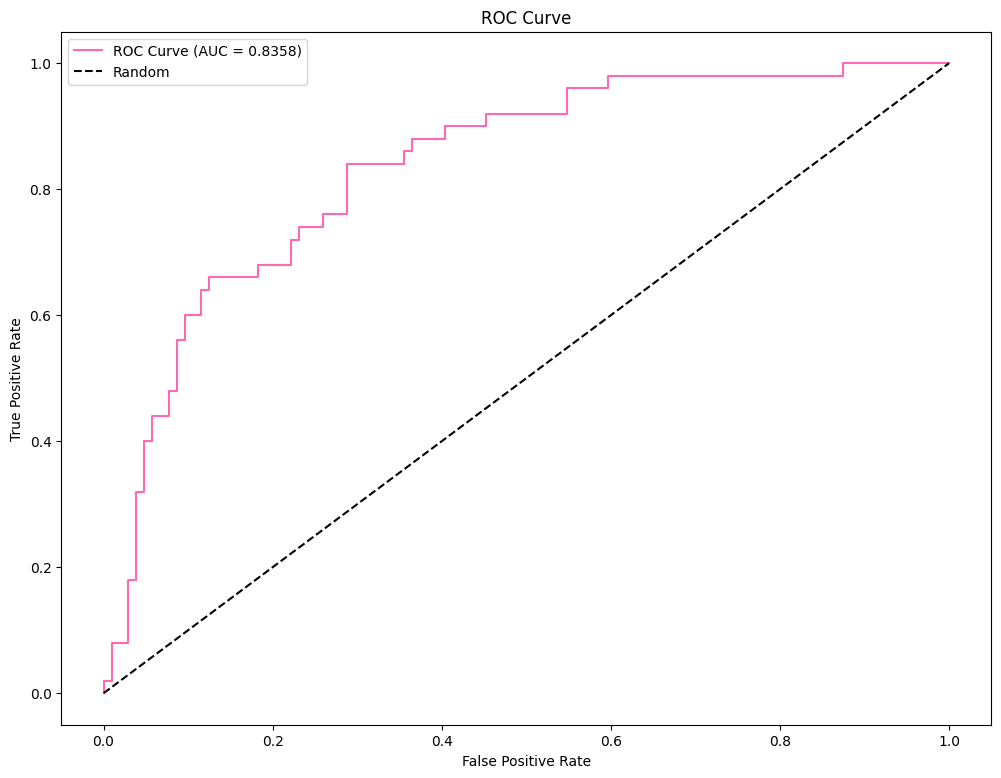

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay

#extracting the outcome
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

#splitting our data into test, training and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#scaling our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_val_probs = logistic_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='hotpink')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Before finding the optimal treshold, I will answer some of the helper questions.

## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?


In binary classification problems, each outcome is labeled as either positive or negative. There are four possible outcomes from the binary classifier:

  - **True Positive (TP)**: the model predicts a positive outcome, and the actual value is also positive
  - **False Positive (FP)**: the model predicts a positive outcome, but the actual value is negative
  - **True Negative (TN)**: the model predicts a negative outcome and the actual value is also negative
  - **False Negative (FN)**: the model predicts a negative outcome, but the actual value is positive

To evaluate a classifier's performance, we use two key metrics:
  - **True Positive Rate (Sensitivity)**:  $TP/P = 1 - FNR$, which measures the proportion of positives correctly identified
  - **True Negative Rate (Specificity)**: $TN/N = 1 - FPR$, which measure the proportion of the negatives correctly identified

The classification decision depends on a threshold, which determines whether an outcome us classified as positive or negative. Adjusting this threshold directly impacts sensitivity and specificity.

**Lowering the threshold** increases the number of true positives, improving sensitivity but also raising the false positive rate, therefore reducing specificity.

**Raising the threshold** decreaases the false positive rate, improving specificity, but may result in more false negatives, reducing sensitivity.

The data distribution almost always overlaps, therefore we need to balance the sensitivity and specificity depending on the classification task.

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)




The optimal threshold does depend on the specific task. In some cases, we may prioritize higher sensitivity, while in others, specificity is more crucial - or even a different metric altogether.

Maximizing sensitivity is often preferred in scenarios where detecting true positives is critical. For instance, in disease diagnosis, we want to identify all individuals who have the condition to ensure they receive proper treatment, potentially saving lives. A higher false positive rate is a lesser concern, as additional tests can confirm the actual diagnosis. The same logic applies to airport security screenings: missing a potential threat could have catastrophic consequences, whereas extra screenings for innocent passengers are a manageable inconvenience.

On the other hand, specificity is more important when false positives carry significant consequences. In medicine, an excess of false positives coulud lead to unnecesary, costly, or even harmful treatments. Similarly, spam filters must prioritize specificity to prevent important business emails from being mistakenly classified as spam. The same principle applies to legal verdicts, where the justice system aims to minimize wrongful convictions.

Ultimately, every classification problem requires a balance between sensitivity and specificity, ensuring an optimal trade-off based on the context and the stakes involved.


3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.
   


The ROC curve (Receiver Operating Characteristic curve) is a graphical representation of a  classifier's performance across different threshol settings. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** to illustrate the trade-off between sensitivity adn specificity.

The **ROC curve** helps visualize the balance between correctly identifying positive  cases(sensitivity) and minimizing false posistives (1-specificity). The best possible classifier would yield a point in the upper left corner of the ROC space, indicating 100% sensitivity and 100% specificity. In contrast, a random classifier would produce points along the diagonal line, representing no discrmination ability.


5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.


The AUC(Area Under the curve) quantifies the overall performance of the classifier. A higher AUC indicates a better-performing model, as it suggests a higher probability that the classifier ranks a randomly chosen positive instance higher than a randomly chosen negative instance. If one model has a higher AUC than another, it is generally considered the better classifier.



4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

One of the approaches to choosing the optimal threshold is maximizing the **Youden's J Statistic**: $J = Sensitivity + Specificity -1$. Therefore we need to maximize $TPR- FPR$. By maximizing the Youden's J Statistic, we maximize the distance from the 'random' line.

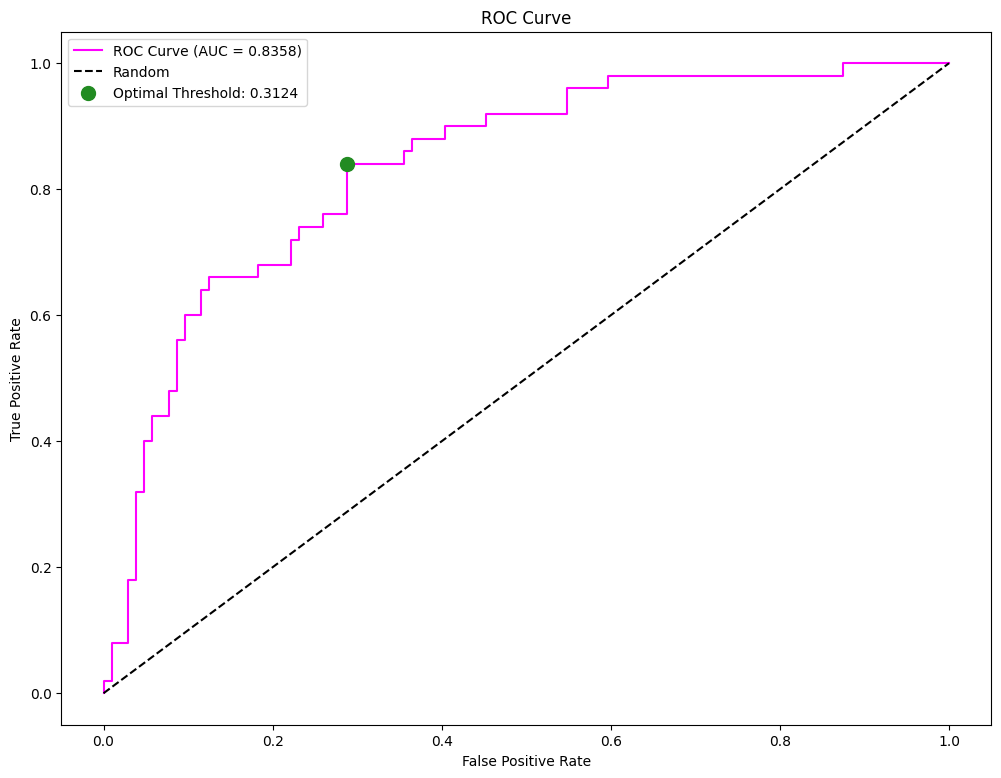

Accuracy:  0.7337662337662337
Precision:  0.5774647887323944
Recall:  0.7884615384615384
F1-Score:  0.6666666666666666
Confusion Matrix: 
 [[72 30]
 [11 41]]
Specificity:  0.7058823529411765


In [15]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

j_scores = tpr - fpr
optimal_idx_j = np.argmax(j_scores)
optimal_threshold_j = thresholds[optimal_idx_j]

y_test_probs = logistic_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= optimal_threshold_j).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='magenta', zorder = 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.scatter(fpr[optimal_idx_j], tpr[optimal_idx_j], color='forestgreen',s = 100, label=f'Optimal Threshold: {optimal_threshold_j:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
print("Confusion Matrix: \n", cm)
print("Specificity: ", specificity)
